In [414]:
import pandas as pd
import numpy as np
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from import_data import *
from cleaning import *

In [20]:
salary = get_data('data/salary.p')
stats = get_data('data/stats.p')
free_agents = get_data('data/free_agents.p')

In [412]:
add_features(stats)

NameError: name 'add_features' is not defined

In [136]:
final_data = combine_data(salary,stats,free_agents)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [137]:
final_data['Churn'] = (final_data['From'] != final_data['To']).astype(int)
final_data.drop(['Avg. Salary','Pos.','To','From','Tm','Year of Free Agency','Year'],axis=1,inplace=True)
final_data['PTS'] = final_data['PTS'].astype(float)
final_data['PF'] = final_data['PF'].astype(float)
final_data['TOV'] = final_data['TOV'].astype(float)
final_data['Age'] = final_data['Age'].astype(float)
final_data['BLK'] = final_data['BLK'].astype(float)
final_data['STL'] = final_data['STL'].astype(float)
final_data['AST'] = final_data['AST'].astype(float)
final_data['TRB'] = final_data['TRB'].astype(float)
final_data['FT%'] = final_data['FT%'].astype(float)
final_data['FTA'] = final_data['FTA'].astype(float)
final_data['FT'] = final_data['FT'].astype(float)
final_data['eFG%'] = final_data['eFG%'].astype(float)
final_data['2P%'] = final_data['2P%'].astype(float)
final_data['2PA'] = final_data['2PA'].astype(float)
final_data['2P'] = final_data['2P'].astype(float)
final_data['3P%'] = final_data['3P%'].astype(float)
final_data['3PA'] = final_data['3PA'].astype(float)
final_data['3P'] = final_data['3P'].astype(float)
final_data['FG%'] = final_data['FG%'].astype(float)
final_data['FGA'] = final_data['FGA'].astype(float)
final_data['FG'] = final_data['FG'].astype(float)
final_data['MP'] = final_data['MP'].astype(float)
final_data['GS'] = final_data['GS'].astype(float)
final_data['G'] = final_data['G'].astype(float)
final_data['Salary'] = final_data['Salary'].astype(float)
final_data['Pos'] = final_data['Pos'].astype('category')
final_data['Yrs'] = final_data['Yrs'].astype('category')
final_data['Type'] = final_data['Type'].astype('category')
final_data.fillna({'eFG%':0,'PPM':0},inplace=True)

In [138]:
# final_data['PPM'] = final_data['PTS'] / final_data['MP']
final_data.drop(['3P%','2P%','FT%','FG%','eFG%'],axis=1,inplace=True)

In [139]:
subset = final_data[~(final_data['MP'].isna())&~(final_data['Salary'].isna())]

In [140]:
subset1 = subset.drop(['Pos','Yrs','Type'],axis=1)

In [141]:
X = subset1.drop('Churn',axis=1)
y = subset1['Churn']
X1, x_val, y1, y_val = train_test_split(X,y,test_size=0.1)

In [311]:
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [336]:
pca = PCA(n_components=3).fit(X2)
nba_reduced = np.dot(X1,pca.components_.T)

In [364]:
print(pd.DataFrame(pca.components_,columns=X1.columns,index = ['PC-1','PC-2','PC-3']))

      Team Cap       Age         G        GS        MP        FG       FGA  \
PC-1  0.000624  0.014801  0.177287  0.223103  0.273445  0.282190  0.277721   
PC-2  0.003602 -0.064171 -0.007920  0.043597 -0.067368 -0.007147 -0.096094   
PC-3 -0.012177  0.362931 -0.036992 -0.007327 -0.025965  0.016788  0.022859   

            3P       3PA        2P    ...          BLK       TOV        PF  \
PC-1  0.154868  0.157323  0.261364    ...     0.119340  0.248550  0.196502   
PC-2 -0.482141 -0.489313  0.200361    ...     0.432042 -0.053973  0.156486   
PC-3 -0.022142 -0.013649  0.029374    ...    -0.033345  0.047527 -0.086070   

           PTS  Playoffs  Diff MP3  Diff PTS3    Traded  Years Same Team  \
PC-1  0.282618  0.001149  0.088095   0.082212 -0.010448         0.088904   
PC-2 -0.059959  0.015617 -0.036411  -0.021249 -0.053356         0.040688   
PC-3  0.018862  0.047891 -0.584495  -0.585754  0.095333         0.095078   

        Salary  
PC-1  0.174638  
PC-2  0.044304  
PC-3  0.366301  



In [337]:
x = np.linspace(2,19,18)
scores = []
for k in range(2,20):
    km = KMeans(n_clusters=k)
    km.fit(nba_reduced)
    labels = km.predict(nba_reduced)
    scores.append(silhouette_score(nba_reduced,labels))

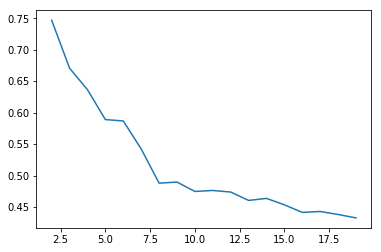

In [338]:
plt.plot(x,scores)

In [339]:
km = KMeans(n_clusters=4)
km.fit(nba_reduced)
labels = km.predict(nba_reduced)

In [340]:
group0 = X1[labels==0]
y10 = y1[labels==0]
X0_train, X0_test, y0_train, y0_test = train_test_split(group0,y10)
group1 = X1[labels==1]
y11 = y1[labels==1]
X1_train, X1_test, y1_train, y1_test = train_test_split(group1,y11)
group2 = X1[labels==2]
y12 = y1[labels==2]
X2_train, X2_test, y2_train, y2_test = train_test_split(group2,y12)
group3 = X1[labels==3]
y13 = y1[labels==3]
X3_train, X3_test, y3_train, y3_test = train_test_split(group3,y13)

In [341]:
params0 = {'learning_rate':[0.001,0.01,0.1],
          'n_estimators':[50,100,300],
          'max_depth':[5,8,10,12],
          'max_features':[None,'sqrt'],
          'subsample':[0.25,0.5,0.75]}
gbc = GradientBoostingClassifier()
gs0 = GridSearchCV(gbc,param_grid=params0,scoring='f1',cv=3).fit(X0_train,y0_train)
gs0.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 100,
 'subsample': 0.5}

In [348]:
gbc = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,max_features=None,n_estimators=100,subsample=0.5)
gbc.fit(X0_train,y0_train)
pred0 = gbc.predict(X0_test)
f1_score(y0_test,pred0), sum(pred0==y0_test)/len(pred0)

(0.8923076923076924, 0.8055555555555556)

In [344]:
gbc = GradientBoostingClassifier(learning_rate=0.005,max_depth=8,max_features='sqrt',n_estimators=300,subsample=0.5)
gbc.fit(X0_train,y0_train)
pred0t = gbc.predict(X0_train)
f1_score(y0_train,pred0t), sum(pred0t==y0_train)/len(pred0t)

(0.976878612716763, 0.9627906976744186)

In [345]:
y0_test.values[np.where(pred0!=y0_test)[0]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [346]:
pred0[np.where(pred0!=y0_test)[0]]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [349]:
X0_test.iloc[np.where(pred0!=y0_test)[0]]

,Team Cap,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,BLK,TOV,PF,PTS,Playoffs,Diff MP3,Diff PTS3,Traded,Years Same Team,Salary
Dirk Nowitzki,7507593,37.0,75.0,75.0,31.5,6.6,14.8,1.7,4.6,5.0,...,0.7,1.1,2.1,18.3,1.0,0.166667,-0.800000,0.0,6.0,8333333.0
Kyle Korver,-16714450,35.0,67.0,22.0,26.2,3.6,7.7,2.4,5.4,1.1,...,0.3,1.0,1.6,10.1,0.0,-3.266667,-0.366667,1.0,1.0,5239437.0
Ersan Ilyasova,19157543,29.0,82.0,52.0,26.1,4.7,10.9,1.7,4.9,3.0,...,0.3,1.4,2.6,13.1,0.0,1.366667,1.433333,1.0,2.0,8400000.0
Francisco Garcia,7870622,31.0,58.0,20.0,17.7,2.0,5.2,1.2,3.1,0.9,...,0.7,0.6,1.5,5.5,0.0,-1.600000,-1.166667,1.0,1.0,6100000.0
Aaron Brooks,7870622,28.0,53.0,20.0,18.8,2.7,6.0,0.9,2.5,1.8,...,0.2,1.3,1.8,7.1,0.0,-1.500000,-1.800000,1.0,2.0,5750000.0
Jamal Crawford,-2220492,35.0,79.0,5.0,26.9,4.8,11.9,1.5,4.4,3.3,...,0.2,1.4,1.5,14.2,1.0,-1.033333,-2.000000,0.0,4.0,5675000.0
Jeff Foster,25893254,34.0,56.0,3.0,16.8,1.4,3.0,0.0,0.1,1.4,...,0.6,0.5,2.3,3.3,1.0,0.000000,0.000000,0.0,1.0,6655000.0
Kyle Lowry,732477,27.0,79.0,79.0,36.2,5.8,13.7,2.4,6.3,3.4,...,0.2,2.5,3.4,17.9,1.0,3.533333,3.300000,0.0,2.0,6210000.0
Dirk Nowitzki,35972940,39.0,77.0,77.0,24.7,4.5,9.8,1.8,4.4,2.7,...,0.6,0.7,1.9,12.0,0.0,-2.833333,-2.833333,0.0,8.0,5000000.0
Glen Davis,-6237614,25.0,78.0,13.0,29.5,4.6,10.3,0.0,0.2,4.6,...,0.4,1.1,3.0,11.7,1.0,0.000000,0.000000,0.0,1.0,3300000.0


In [172]:
X0_test.iloc[np.where(pred0==y0_test)[0]]

,Team Cap,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,BLK,TOV,PF,PTS,Playoffs,Diff MP3,Diff PTS3,Traded,Years Same Team,Salary
Ronnie Price,20812025,30.0,31.0,2.0,12.2,0.9,3.0,0.3,1.4,0.6,...,0.1,0.8,1.6,2.4,0.0,-1.033333,-0.500000,0.0,1.0,1265977.0
Johnny OBryant,20604447,22.0,66.0,4.0,13.0,1.3,3.2,0.0,0.0,1.3,...,0.1,0.5,1.5,3.0,0.0,1.100000,0.050000,0.0,2.0,845059.0
Luther Head,33654689,28.0,36.0,14.0,16.3,1.9,4.6,0.7,1.8,1.2,...,0.3,0.9,1.2,5.6,0.0,0.000000,0.000000,0.0,1.0,992680.0
Baron Davis,19843826,31.0,58.0,44.0,28.4,5.0,11.9,1.4,4.1,3.6,...,0.5,2.5,2.5,13.1,0.0,0.000000,0.000000,1.0,1.0,13000000.0
Evan Turner,20251839,27.0,81.0,12.0,28.0,4.2,9.3,0.2,1.0,4.0,...,0.3,2.1,1.7,10.5,1.0,-0.633333,-0.833333,0.0,2.0,3425510.0
Markel Brown,29533862,24.0,62.0,6.0,15.8,2.0,5.2,0.6,2.0,1.4,...,0.2,0.9,1.5,5.9,0.0,-0.400000,0.650000,0.0,2.0,845059.0
Josh McRoberts,25893254,23.0,72.0,51.0,22.2,2.9,5.4,0.3,0.8,2.6,...,0.8,1.3,2.3,7.4,1.0,0.000000,0.000000,0.0,1.0,885120.0
Glen Davis,18231269,27.0,34.0,33.0,31.3,6.3,14.1,0.0,0.1,6.3,...,0.6,1.9,2.6,15.1,0.0,3.233333,3.066667,0.0,2.0,6400000.0
Ian Mahinmi,19284996,29.0,71.0,71.0,25.6,3.7,6.3,0.0,0.0,3.7,...,1.1,1.4,3.1,9.3,1.0,5.400000,3.600000,0.0,4.0,4000000.0
Sergio Rodriguez,19245064,30.0,68.0,30.0,22.3,3.1,7.9,1.4,3.7,1.7,...,0.1,1.9,1.4,7.8,0.0,0.000000,0.000000,0.0,1.0,6800000.0


In [365]:
params1 = {'learning_rate':[0.001,0.01,0.1,0.5],
          'n_estimators':[50,75,100,200,300],
          'max_depth':[2,5,8,10],
          'max_features':[None,'sqrt'],
          'subsample':[0.25,0.5,0.75,1]}
gbc = GradientBoostingClassifier()
gs1 = GridSearchCV(gbc,param_grid=params1,scoring='f1',cv=3).fit(X1_train,y1_train)
gs1.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.25}

In [366]:
gbc = GradientBoostingClassifier(learning_rate=0.01 ,max_features=None,max_depth=2,n_estimators=200,subsample=0.25)
gbc.fit(X1_train,y1_train)
pred1 = gbc.predict(X1_test)
f1_score(y1_test,pred1),sum(pred1==y1_test)/len(pred1)

(0.87292817679558, 0.7830188679245284)

In [367]:
gbc = GradientBoostingClassifier(learning_rate=0.01 ,max_features='sqrt',max_depth=5,n_estimators=200,subsample=0.25)
gbc.fit(X1_train,y1_train)
pred1t = gbc.predict(X1_train)
f1_score(y1_train,pred1t),sum(pred1t==y1_train)/len(pred1t)

(0.9032258064516129, 0.8391167192429022)

In [368]:
y1_test.values[np.where(pred1!=y1_test)[0]]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [369]:
pred1[np.where(pred1!=y1_test)[0]]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1])

In [370]:
X1_test.iloc[np.where(pred1!=y1_test)[0]]

,Team Cap,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,BLK,TOV,PF,PTS,Playoffs,Diff MP3,Diff PTS3,Traded,Years Same Team,Salary
Brandon Jennings,17518476,23.0,80.0,80.0,36.2,6.2,15.6,2.2,5.8,4.1,...,0.1,2.5,1.9,17.5,1.0,0.900000,-0.100000,0.0,3.0,3179493.0
Terrence Williams,-1269087,24.0,30.0,0.0,18.3,2.8,6.6,0.5,1.5,2.3,...,0.2,1.4,1.2,7.1,0.0,2.250000,1.050000,1.0,2.0,2369040.0
Joe Ingles,12403746,29.0,82.0,26.0,24.0,2.5,5.5,1.5,3.4,1.0,...,0.1,1.3,2.0,7.1,0.0,3.833333,1.666667,0.0,3.0,2100000.0
Nazr Mohammed,9396463,36.0,80.0,1.0,7.0,0.7,1.6,0.0,0.0,0.7,...,0.4,0.5,1.0,1.6,1.0,-2.666667,-0.700000,0.0,2.0,1399507.0
Charlie Villanueva,11643139,30.0,64.0,1.0,10.6,2.3,5.7,1.3,3.5,1.0,...,0.3,0.4,1.0,6.3,1.0,-1.200000,0.400000,0.0,1.0,1316809.0
Tim Frazier,11866073,25.0,51.0,2.0,14.5,1.9,4.5,0.3,0.9,1.6,...,0.0,1.3,1.4,5.1,0.0,-3.600000,-0.050000,1.0,2.0,989216.0
Jon Leuer,-146257,23.0,28.0,0.0,6.7,0.9,1.9,0.0,0.1,0.9,...,0.0,0.3,0.8,2.0,0.0,-2.700000,-1.350000,1.0,1.0,762195.0
Troy Williams,994549,22.0,30.0,16.0,18.6,2.4,5.6,0.6,2.1,1.8,...,0.3,1.1,2.0,6.2,0.0,0.000000,0.000000,1.0,1.0,652165.0
DeShawn Stevenson,3814473,30.0,51.0,30.0,18.8,1.0,3.4,0.8,2.8,0.2,...,0.1,0.4,1.2,2.9,0.0,1.350000,-1.200000,0.0,1.0,2500000.0
Garrett Temple,3326319,27.0,75.0,0.0,8.5,0.7,1.9,0.1,0.4,0.6,...,0.1,0.6,1.0,1.8,1.0,-5.100000,-1.300000,0.0,2.0,916099.0


In [371]:
params2 = {'learning_rate':[0.001,0.01,0.1,0.5],
          'n_estimators':[75,100,200,300],
          'max_depth':[2,5,8,10],
          'max_features':[None,'sqrt'],
          'subsample':[0.25,0.5,0.75,1]}
gbc = GradientBoostingClassifier()
gs2 = GridSearchCV(gbc,param_grid=params2,scoring='f1',cv=3).fit(X2_train,y2_train)
gs2.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 75,
 'subsample': 0.5}

In [401]:
gbc = GradientBoostingClassifier(learning_rate=0.01 ,max_features='sqrt',max_depth=2,n_estimators=75,subsample=0.5)
gbc.fit(X2_train,y2_train)
pred2 = gbc.predict(X2_test)
f1_score(y2_test,pred2),sum(pred2==y2_test)/len(pred2)

(0.888888888888889, 0.8181818181818182)

In [386]:
gbc = GradientBoostingClassifier(learning_rate=0.01 ,max_features='sqrt',max_depth=2,n_estimators=75,subsample=0.5)
gbc.fit(X2_train,y2_train)
pred2t = gbc.predict(X2_train)
f1_score(y2_train,pred2t),sum(pred2t==y2_train)/len(pred2t)

(0.8936170212765957, 0.8484848484848485)

In [405]:
X2_test.iloc[np.where(pred2!=y2_test)[0]]

,Team Cap,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,BLK,TOV,PF,PTS,Playoffs,Diff MP3,Diff PTS3,Traded,Years Same Team,Salary
Dwyane Wade,862596,32.0,54.0,53.0,32.9,7.7,14.1,0.2,0.6,7.5,...,0.5,3.0,2.0,19.0,1.0,-0.7,-1.766667,0.0,4.0,18536000.0
Kevin Garnett,-1269087,35.0,60.0,60.0,31.1,6.5,13.0,0.1,0.2,6.5,...,1.0,1.8,2.4,15.8,1.0,-0.1,0.450000,0.0,2.0,21247044.0


In [393]:
y2_test.iloc[np.where(pred2!=y2_test)[0]]

Dwyane Wade       0
Deron Williams    0
Kevin Garnett     0
Name: Churn, dtype: int64

In [426]:
params3 = {'learning_rate':[0.001,0.01,0.1,0.5],
          'n_estimators':[75,100,200,300],
          'max_depth':[2,5,8,10],
          'max_features':[None,'sqrt'],
          'subsample':[0.25,0.5,0.75,1]}
gbc = GradientBoostingClassifier()
gs3 = GridSearchCV(gbc,param_grid=params3,scoring='f1',cv=3).fit(X3_train,y3_train)
gs3.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 75,
 'subsample': 1}

In [435]:
gbc = GradientBoostingClassifier(learning_rate=0.01,max_features='sqrt',max_depth=10,n_estimators=75,subsample=1)
gbc.fit(X3_train,y3_train)
pred3 = gbc.predict(X3_test)
f1_score(y3_test,pred3),sum(pred3==y3_test)/len(pred3)

(0.8181818181818181, 0.6923076923076923)

In [436]:
gbc = GradientBoostingClassifier(learning_rate=0.01 ,max_features='sqrt',max_depth=10,n_estimators=100,subsample=0.5)
gbc.fit(X3_train,y3_train)
pred3t = gbc.predict(X3_train)
f1_score(y3_train,pred3t),sum(pred3t==y3_train)/len(pred3t)

(0.9411764705882353, 0.9078947368421053)

In [260]:
params4 = {'learning_rate':[0.001,0.01,0.1,0.5],
          'n_estimators':[75,100,200,300],
          'max_depth':[2,5,8,10],
          'max_features':[None,'sqrt'],
          'subsample':[0.25,0.5,0.75,1]}
gbc = GradientBoostingClassifier()
gs4 = GridSearchCV(gbc,param_grid=params4,scoring='f1',cv=3).fit(X4_train,y4_train)
gs4.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 75,
 'subsample': 0.25}

In [307]:
gbc = GradientBoostingClassifier(learning_rate=0.01,max_features=None,max_depth=10,n_estimators=75,subsample=0.25)
gbc.fit(X4_train,y4_train)
pred4 = gbc.predict(X4_test)
f1_score(y4_test,pred4),sum(pred4==y4_test)/len(pred4)

(0.7500000000000001, 0.6774193548387096)

In [299]:
X4_test.iloc[np.where(pred4!=y4_test)[0]]

,Team Cap,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,BLK,TOV,PF,PTS,Playoffs,Diff MP3,Diff PTS3,Traded,Years Same Team,Salary
Landry Fields,-8547599,23.0,66.0,62.0,28.7,3.6,7.8,0.5,1.8,3.1,...,0.3,1.5,1.5,8.8,1.0,-1.150000,-0.450000,0.0,2.0,762195.0
Keith Bogans,-13222674,31.0,5.0,1.0,18.8,1.6,4.2,0.6,2.4,1.0,...,0.0,0.6,3.0,4.2,0.0,0.500000,-0.100000,0.0,1.0,848266.0
Brook Lopez,-13222674,23.0,5.0,5.0,27.2,7.6,15.4,0.0,0.0,7.6,...,0.8,1.2,1.6,19.2,0.0,-4.000000,-0.600000,0.0,2.0,3076983.0
Jeremy Lin,-8547599,23.0,35.0,25.0,26.9,4.9,10.9,0.7,2.1,4.2,...,0.3,3.6,2.2,14.6,1.0,8.550000,6.000000,0.0,1.0,762195.0
Pablo Prigioni,-16529907,35.0,78.0,18.0,16.2,1.3,2.8,0.7,1.7,0.6,...,0.0,1.1,1.6,3.5,1.0,0.000000,0.000000,0.0,1.0,473604.0
Andray Blatche,-31180076,26.0,82.0,8.0,19.0,4.2,8.2,0.0,0.3,4.2,...,0.7,1.5,2.0,10.3,0.0,-6.666667,-1.566667,0.0,1.0,7972891.0
Taj Gibson,-13654346,31.0,78.0,71.0,25.5,4.7,9.1,0.0,0.2,4.6,...,0.8,1.3,2.1,10.8,0.0,-0.933333,0.900000,1.0,1.0,8950000.0
Richard Jefferson,-13303785,35.0,74.0,5.0,17.9,1.9,4.2,0.9,2.3,1.0,...,0.2,0.6,1.7,5.5,1.0,-2.666667,-1.633333,0.0,1.0,1499187.0
Quentin Richardson,-16529907,32.0,1.0,0.0,29.0,1.0,11.0,1.0,4.0,0.0,...,0.0,2.0,1.0,5.0,1.0,7.733333,0.366667,0.0,1.0,2706940.0
Raymond Felton,-19136264,33.0,82.0,2.0,16.6,2.7,6.7,1.0,2.8,1.7,...,0.2,0.9,1.1,6.9,1.0,-5.166667,-0.800000,0.0,1.0,2328652.0


In [300]:
y4_test.iloc[np.where(pred4!=y4_test)[0]]

Landry Fields          1
Keith Bogans           0
Brook Lopez            1
Jeremy Lin             1
Pablo Prigioni         0
Andray Blatche         0
Taj Gibson             1
Richard Jefferson      0
Quentin Richardson     1
Raymond Felton         0
Matthew Dellavedova    0
Name: Churn, dtype: int64

In [302]:
pred4[np.where(pred4!=y4_test)[0]]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [308]:
gbc = GradientBoostingClassifier(learning_rate=0.01,max_features=None,max_depth=10,n_estimators=75,subsample=0.25)
gbc.fit(X4_train,y4_train)
pred4t = gbc.predict(X4_train)
f1_score(y4_train,pred4t),sum(pred4t==y4_train)/len(pred4t)

(0.8382352941176471, 0.7634408602150538)

In [437]:
total_accuracy = (sum(pred0==y0_test)+sum(pred1==y1_test)+sum(pred2==y2_test)+sum(pred3==y3_test))/(len(pred0)+len(pred1)+len(pred2)+len(pred3))
total_accuracy

0.7819314641744548

In [ ]:
# cluster based on just salary, team cap, diff metrics, Years same team

In [11]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
x = np.linspace(1,39,39)
scores = []
for k in range(2,40):
    km = KMeans(n_clusters=k)
    km.fit(scaled_X,y)
    labels = km.predict(scaled_X)
    scores.append(silhouette_score(scaled_X,labels))
scores

[0.22875524956209056,
 0.12736176503430424,
 0.12712834218109553,
 0.11337933542042197,
 0.09464128169062243,
 0.075270840333768,
 0.07189430507264793,
 0.10598124759316872,
 0.07340938636742934,
 0.10552584056086221,
 0.09800201113513135,
 0.08715843025193146,
 0.11894676301903824,
 0.10149916659718294,
 0.11614243951613645,
 0.11097772711651482,
 0.09951974198301075,
 0.11417564211966288,
 0.10866485699613064,
 0.10894763499647572,
 0.12496230047651447,
 0.11298267633673197,
 0.11791263663822282,
 0.11242697620956638,
 0.11204289542522529,
 0.12423303637726223,
 0.11335011503168921,
 0.12130098644398306,
 0.1171754263132526,
 0.11514474423468112,
 0.11985942102175635,
 0.11341682416316555,
 0.1163211163534143,
 0.11705770399059823,
 0.11796324226474185,
 0.11288795849170112,
 0.11765851795541668,
 0.11635277797289242]

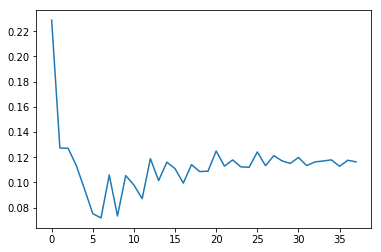

In [13]:
plt.plot(scores)

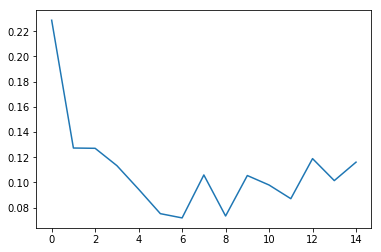

In [14]:
plt.plot(scores[:15])

In [16]:
km = KMeans(n_clusters=7)
km.fit(X,y)
labels = km.predict(X)

In [32]:
group0 = X[labels==0]
y0 = y[labels==0]
X0_train, X0_test, y0_train, y0_test = train_test_split(group0,y0)
group1 = X[labels==1]
y1 = y[labels==1]
X1_train, X1_test, y1_train, y1_test = train_test_split(group1,y1)
group2 = X[labels==2]
y2 = y[labels==2]
X2_train, X2_test, y2_train, y2_test = train_test_split(group2,y2)
group3 = X[labels==3]
y3 = y[labels==3]
X3_train, X3_test, y3_train, y3_test = train_test_split(group3,y3)
group4 = X[labels==4]
y4 = y[labels==4]
X4_train, X4_test, y4_train, y4_test = train_test_split(group4,y4)
group5 = X[labels==5]
y5 = y[labels==5]
X5_train, X5_test, y5_train, y5_test = train_test_split(group5,y5)
group6 = X[labels==6]
y6 = y[labels==6]
X6_train, X6_test, y6_train, y6_test = train_test_split(group6,y6)

In [55]:
params0 = {'learning_rate':[0.01,0.01,0.05,0.1],
          'n_estimators':[50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs0 = GridSearchCV(gbc,param_grid=params0,scoring='f1',cv=3).fit(X0_train,y0_train)
gs0.best_params_

In [58]:
gbc = GradientBoostingClassifier(learning_rate=0.05 ,max_features='sqrt',max_depth=8,n_estimators=100)
gbc.fit(X0_train,y0_train)
pred0 = gbc.predict(X0_test)
f1_score(y0_test,pred0)

0.8831168831168832

In [60]:
params1 = {'learning_rate':[0.01,0.01,0.05,0.1],
          'n_estimators':[50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs1 = GridSearchCV(gbc,param_grid=params1,scoring='f1',cv=3).fit(X1_train,y1_train)
gs1.best_params_

In [62]:
gbc = GradientBoostingClassifier(learning_rate=0.05 ,max_features='sqrt',max_depth=6,n_estimators=50)
gbc.fit(X1_train,y1_train)
pred1 = gbc.predict(X1_test)
f1_score(y1_test,pred1)

0.8571428571428571

In [64]:
params2 = {'learning_rate':[0.001,0.005,0.01,0.01,0.05],
          'n_estimators':[40,50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs2 = GridSearchCV(gbc,param_grid=params2,scoring='f1',cv=3).fit(X2_train,y2_train)
gs2.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.005,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [65]:
gbc = GradientBoostingClassifier(learning_rate=0.005,max_features='sqrt',max_depth=5,n_estimators=100)
gbc.fit(X2_train,y2_train)
pred2 = gbc.predict(X2_test)
f1_score(y2_test,pred2)

0.9090909090909091

In [94]:
params3 = {'learning_rate':[0.001,0.005,0.01,0.01,0.05,0.75,0.1],
          'n_estimators':[40,50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs3 = GridSearchCV(gbc,param_grid=params3,scoring='f1',cv=3).fit(X3_train,y3_train)
gs3.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 85}

In [95]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_features='sqrt',max_depth=4,n_estimators=85)
gbc.fit(X3_train,y3_train)
pred3 = gbc.predict(X3_test)
f1_score(y3_test,pred3)

0.8736462093862816

In [113]:
params4 = {'learning_rate':[0.001,0.005,0.01,0.01,0.05],
          'n_estimators':[40,50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs4 = GridSearchCV(gbc,param_grid=params4,scoring='f1',cv=3).fit(X4_train,y4_train)
gs4.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [73]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_features='sqrt',max_depth=2,n_estimators=60)
gbc.fit(X4_train,y4_train)
pred4 = gbc.predict(X4_test)
f1_score(y4_test,pred4)

0.5555555555555556

In [77]:
params5 = {'learning_rate':[0.001,0.005,0.01,0.01,0.05],
          'n_estimators':[40,50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs5 = GridSearchCV(gbc,param_grid=params5,scoring='f1',cv=3).fit(X5_train,y5_train)
gs5.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [78]:
gbc = GradientBoostingClassifier(learning_rate=0.05,max_features='sqrt',max_depth=2,n_estimators=40)
gbc.fit(X5_train,y5_train)
pred5 = gbc.predict(X5_test)
f1_score(y5_test,pred5)

0.8771929824561403

In [79]:
params6 = {'learning_rate':[0.001,0.005,0.01,0.01,0.05],
          'n_estimators':[40,50,60,75,85,100],
          'max_depth':[2,3,4,5,6,7,8],
          'max_features':[None,'sqrt','auto']}
gbc = GradientBoostingClassifier()
gs6 = GridSearchCV(gbc,param_grid=params6,scoring='f1',cv=3).fit(X6_train,y6_train)
gs6.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.005,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 85}

In [107]:
gbc = GradientBoostingClassifier(learning_rate=0.005,max_features=None,max_depth=3,n_estimators=85)
gbc.fit(X6_train,y6_train)
pred6 = gbc.predict(X6_test)
f1_score(y6_test,pred6)

0.782608695652174

In [81]:
pred0

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [90]:
y0_test.values

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [82]:
pred1

array([1, 0, 1, 1, 1, 1, 1, 1, 0])

In [91]:
y1_test.values

array([1, 1, 0, 1, 1, 1, 1, 1, 0])

In [83]:
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
y2_test.values

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [96]:
pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [93]:
y3_test.values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [85]:
pred4

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [104]:
y4_test.values

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [86]:
pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [111]:
y5_test.values

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [109]:
pred6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [110]:
y6_test.values

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1])

In [98]:
sum(pred0==y0_test)/len(pred0)

0.8043478260869565

In [99]:
sum(pred1==y1_test)/len(pred1)

0.7777777777777778

In [100]:
sum(pred2==y2_test)/len(pred2)

0.8333333333333334

In [102]:
sum(pred3==y3_test)/len(pred3)

0.7891566265060241

In [112]:
sum(pred4==y4_test)/len(pred4)

0.38461538461538464

In [105]:
sum(pred5==y5_test)/len(pred5)

0.78125

In [108]:
sum(pred6==y6_test)/len(pred6)

0.6666666666666666

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
gbc = GradientBoostingClassifier()
params = {'learning_rate':[0.01,0.025,0.05],
          'n_estimators':[50,60,70,80,90],
          'max_depth':[3,4,5,6,7,8],
          'max_features':[None,'sqrt'],
         'subsample':[0.3,0.5,0.75,1]}
gs = GridSearchCV(gbc,param_grid=params,scoring='f1').fit(X_train,y_train)
gs.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 70,
 'subsample': 1}

In [66]:
len(X_train)

1066

In [59]:
gbc = GradientBoostingClassifier(learning_rate=0.025,n_estimators=90,max_depth=8,max_features='sqrt',min_samples_split=3,subsample=0.75).fit(X_train,y_train)
preds = gbc.predict(X_test)
f1_score(y_test,preds)

0.8737541528239204

In [60]:
sum(preds==y_test)/len(preds)

0.7865168539325843

In [45]:
gbc = GradientBoostingClassifier(learning_rate=0.025,n_estimators=90,max_depth=8,max_features='sqrt').fit(X_train,y_train)
preds = gbc.predict(X_train)
f1_score(y_train,preds)

0.9882643607164916

In [61]:
baseline = 1075/1422

In [106]:
.833-baseline

0.07702250351617435